Authors: 
        My Vu,
        Merijn van Toledo,
        Jan Orlikowski,
        Randy Dautzenberg,

In [ ]:
%pip install ipython-sparql-pandas
%load_ext ipython_sparql_pandas
%pip install folium
%pip install -U Jinja2
%pip install --upgrade nbformat
%pip install nbformat 
%pip install --upgrade pip
%pip install "jupyterlab>=3" "ipywidgets>=7.6"
%pip install jupyter-dash
%pip install matplotlib
%pip install geojson
%pip install plotly

In [6]:
%%sparql http://localhost:7200/repositories/Emissions -s emissions

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX ex: <http://www.example.org/>
PREFIX ex2: <http://www.ontologyportal.org/SUMO.owl#>

select ?emission ?value where { 
	?emission rdf:type ex:Emission_Entry .
    ?emission ex:hasValue ?value.
} limit 100 

,emission,value
0,http://www.example.org/220824_0930012_2020,368044.902225
1,http://www.example.org/220824_0930012_2005,574711.795944
2,http://www.example.org/220824_0930012_2010,657124.562952
3,http://www.example.org/220824_0930012_1995,445564.95984
4,http://www.example.org/220824_0930012_2000,518178.647844
...,...,...
95,http://www.example.org/10097_T100201_2000,56602950.0
96,http://www.example.org/10097_T100201_2005,57009762.89514
97,http://www.example.org/10097_T100201_2015,50776553.0
98,http://www.example.org/10097_T100201_2020,47713933.0


In [7]:
%%sparql http://localhost:7200/repositories/Emissions -s pollutperjaar

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX ex: <http://www.example.org/>



select  ?year (SUM(?value) as ?emis) where { 
    ?company ex:hasName ?name.
    ?emission ex:hasCompany ?company.
    ?emission a ex:Emission_Entry.
    ?emission ex:hasValue ?value.
	?emission ex:hasYear ?year.
    FILTER (?name="Akzo Nobel Chemicals BV (Botlek)"@en)
} GROUP BY ?year
ORDER BY asc (?year)

,year,emis
0,1990,198989583.0
1,1995,222230000.0
2,2005,200176708.491
3,2010,180953350.0
4,2015,152069000.0
5,2019,109850194.0
6,2020,117432067.0


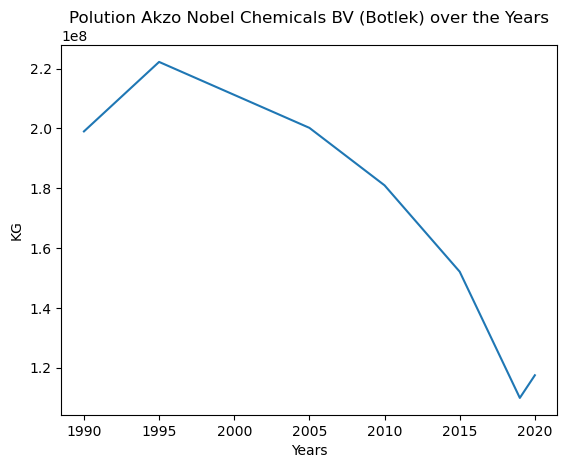

In [8]:
import matplotlib.pyplot as plt

plt.plot(pollutperjaar['year'],pollutperjaar['emis'])
plt.xlabel("Years")
plt.ylabel("KG")
plt.title("Polution Akzo Nobel Chemicals BV (Botlek) over the Years")


##plt.ylim([0, 500000000])

plt.show()

In [9]:
%%sparql http://localhost:7200/repositories/Emissions -s cause1990

PREFIX ex: <http://www.example.org/>
PREFIX ex2: <http://www.ontologyportal.org/SUMO.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
select (SUM(?value) as ?emis) ?year ?causeName where { 
    
    ?emission a ex:Emission_Entry.
    ?emission ex:hasValue ?value.
	?emission ex:hasYear ?year.
    
    ?emission ex:hasCause ?cause.
    ?cause ex:hasName ?causeName.
    FILTER (?year="1990"^^xsd:int)
} GROUP BY ?year ?causeName
ORDER BY asc (?year)

,emis,year,causeName
0,588669437.16,1990,"RWZI spui van slibgistingsgas, CO2, individueel"
1,170390400.0,1990,SBI 06/09.1 (per bedrijf): Aardolie- en gaswin...
2,708480.0,1990,SBI 08 (per bedrijf): Winning van delfstoffen ...
3,2363151653.0,1990,SBI 10-12 (per bedrijf): Voedings- & genotmidd...
4,209509000.0,1990,SBI 10.8 (per bedrijf): Overige voedingsmiddel...
...,...,...,...
66,37504081.469561,1990,"Vliegverkeer, LTO, internationaal, Take Off"
67,4249419.131213763817,1990,"Vliegverkeer, LTO, nationaal, Approach"
68,5254984.51966789915,1990,"Vliegverkeer, LTO, nationaal, Climb Out"
69,4860836.250351944668,1990,"Vliegverkeer, LTO, nationaal, Idle"


In [10]:
import plotly.express as px

cause1990['emis'] = cause1990['emis'].astype(float)

df = cause1990


df.loc[df['emis'] < 5.e8, 'causeName'] = 'overig' # Represent only large causes


fig = px.pie(df, values='emis', names='causeName', title='Distribution of pollution over its causes in 1990')
fig.show()

cause1990

,emis,year,causeName
0,5.886694e+08,1990,"RWZI spui van slibgistingsgas, CO2, individueel"
1,1.703904e+08,1990,overig
2,7.084800e+05,1990,overig
3,2.363152e+09,1990,SBI 10-12 (per bedrijf): Voedings- & genotmidd...
4,2.095090e+08,1990,overig
...,...,...,...
66,3.750408e+07,1990,overig
67,4.249419e+06,1990,overig
68,5.254985e+06,1990,overig
69,4.860836e+06,1990,overig


In [27]:
%%sparql http://localhost:7200/repositories/Emissions -s pollutionPerYearPerSector

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX ex: <http://www.example.org/>
PREFIX ex2: <http://www.ontologyportal.org/SUMO.owl#>

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT (SUM(?value) as ?emissions) ?year ?sector where { 
    ?company ex:hasName ?name.
    ?emission ex:hasCompany ?company.
    ?emission a ex:Emission_Entry.
    ?emission ex:hasValue ?value.
	?emission ex:hasYear ?year.
    ?company rdf:type ?a .
    ?a rdfs:subClassOf ?sector .
    ?b rdfs:subClassOf ex:Company.
    FILTER(?a != ?sector)
} GROUP BY ?year ?sector
ORDER BY asc (?year)

,emissions,year,sector
0,7722309070.0,1990,http://www.example.org/Construction_Company
1,10006699185.0,1990,"http://www.example.org/Trade,_Services_and_Gov..."
2,11755647829.157354,1990,http://www.example.org/Traffic_and_Transport_C...
3,21979515920.600338,1990,http://www.example.org/Sewage_and_Water_Treatm...
4,30083036935.0,1990,http://www.example.org/Waste_Processing_Company
...,...,...,...
80,365367294571.650085,2020,http://www.example.org/Refinery
81,390887291532.674622,2020,http://www.example.org/Other_Company
82,746689530165.014771,2020,http://www.example.org/Chemical_Company
83,1355585300047.342773,2020,http://www.example.org/Energy_Company


In [28]:
pollutionPerYearPerSector['sector'] = pollutionPerYearPerSector['sector'].str.replace('http://www.example.org/', '')
fig = px.line(
    pollutionPerYearPerSector, 
    x="year", 
    y="emissions",  
    log_y=True, 
    width=800,
    color='sector', 
    title="Polution of different sectors over the years",
    labels={
                     "year": "Year",
                     "emissions": "Emissions (kg)",
                     "sector": "Company Type"
                 },)
fig.show()

C:\Users\thaom\AppData\Local\Temp\ipykernel_1656\3165255148.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [13]:
%%sparql http://localhost:7200/repositories/Emissions -s pollutionPerProvincePerYear

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX ex: <http://www.example.org/>
PREFIX ex2: <http://www.ontologyportal.org/SUMO.owl#>

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT (SUM(?value) as ?emissions) ?year ?provinceName where { 
    ?company ex:hasName ?name.
    ?emission ex:hasCompany ?company.
    ?emission a ex:Emission_Entry.
    ?emission ex:hasValue ?value.
	?emission ex:hasYear ?year.
    ?company rdf:type ?a .
    ?company ex:locatedIn ?dorp.
    ?dorp ex:locatedIn ?province.
    ?province ex:hasName ?provinceName.
} GROUP BY ?year ?provinceName
ORDER BY ?year

,emissions,year,provinceName
0,2017244004.305837759040,1990,Drenthe
1,4811977881.2988194448504,1990,Flevoland
2,6258824056.893692,1990,Utrecht
3,6258824056.893692,1990,Utrecht
4,7556520700.8583975312512,1990,Friesland
...,...,...,...
115,66403352975.495499,2020,Noord-Holland
116,81305992725.63443,2020,Groningen
117,81305992725.63443,2020,Groningen
118,113236711122.767487,2020,Zuid-Holland


In [55]:
import geojson

pollutionPerProvincePerYear['emissions'] = pollutionPerProvincePerYear['emissions'].astype(float)

with open('provinces.geojson') as f:
    gj = geojson.load(f)


import plotly.express as px
import plotly.graph_objects as go

df = pollutionPerProvincePerYear
geojson = gj

fig = px.choropleth(pollutionPerProvincePerYear, geojson=geojson, color="emissions", color_continuous_scale='reds',
                    locations="provinceName", featureidkey="properties.name",
                    projection="mercator", animation_frame='year', title="Total emissions per province per year"
                   )
fig.layout.coloraxis.colorbar.title = 'CO2 emissions in kg'

fig.update_geos(fitbounds="locations", visible=True)
fig.show()


In [47]:
%%sparql http://localhost:7200/repositories/Emissions -s pollutionPerYearPerSubsector

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX ex: <http://www.example.org/>
PREFIX ex2: <http://www.ontologyportal.org/SUMO.owl#>

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT (SUM(?value) as ?emissions) (COUNT(?company) as ?companies) ?year ?subsector ?sector where { 
    ?company ex:hasName ?name.
    ?emission ex:hasCompany ?company.
    ?emission a ex:Emission_Entry.
    ?emission ex:hasValue ?value.
	?emission ex:hasYear ?year.
    ?company rdf:type ?subsector .
    ?subsector rdfs:subClassOf ?sector .
    ?sector rdfs:subClassOf ex:Company.
    FILTER(?subsector != ?sector)
    FILTER(?sector != ex:Company)
} GROUP BY  ?year ?subsector ?sector 
ORDER BY asc (?year)

,emissions,companies,year,subsector,sector
0,10141829.0,2,1990,http://www.example.org/Pesticide_Company,http://www.example.org/Chemical_Company
1,6340816.0,3,1990,http://www.example.org/Leather_Company,http://www.example.org/Other_Company
2,49206634.0,4,1990,http://www.example.org/Miscellaneous_Waste_Com...,http://www.example.org/Waste_Processing_Company
3,45654691.0,5,1990,http://www.example.org/Graphical_Company,http://www.example.org/Other_Company
4,35201279.0,6,1990,http://www.example.org/Woodworking_Company,http://www.example.org/Other_Company
...,...,...,...,...,...
179,1036136753.295,86,2020,http://www.example.org/Construction_Material_C...,http://www.example.org/Other_Company
180,16281843744.142546,123,2020,http://www.example.org/Basic_Products_Chemical...,http://www.example.org/Chemical_Company
181,464437797.22033,135,2020,http://www.example.org/Aviation_Company,http://www.example.org/Traffic_and_Transport_C...
182,2602775300.015883,142,2020,http://www.example.org/Food_and_Stimulant_Company,http://www.example.org/Other_Company


In [53]:
pollutionPerYearPerSubsector['sector'] = pollutionPerYearPerSubsector['sector'].str.replace('http://www.example.org/', '')
pollutionPerYearPerSubsector['subsector'] = pollutionPerYearPerSubsector['subsector'].str.replace('http://www.example.org/', '')

px.scatter(pollutionPerYearPerSubsector, x="year", y="emissions",
	         size="companies", color="sector",
                 hover_name="subsector", log_y=True,size_max=60)

C:\Users\thaom\AppData\Local\Temp\ipykernel_1656\1202029544.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\thaom\AppData\Local\Temp\ipykernel_1656\1202029544.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.

